# Introduction to Probabilistic Graphical Models
##     Practical session 1


## Question 0 :

In many practical applications, we often need to compute :

$\begin{equation}
s = log\left( \sum\limits_{i=1}^n e^{v_i}\right)  \quad \text{ where $\forall v_i$,  $v_i < 0$ and  $|v_i|$ is very large.}  
\end{equation} $

Derive (mathematically) and implement $\texttt{anumerically stable }$algorithm for computing $log\left( \sum\limits_{i=1}^n e^{v_i}\right)$, where $ v={\{ v_i \} }^I_{i=1} $ is a vector of numbers.  Explain why it should work.  Test your algorithm on log(sum(exp{-1234, -1235})).




1. How can we compute $s = log\left( \sum\limits_{i=1}^n e^{v_i}\right)$ ?

The problem to directly calculate this equation is that if one ${v_i}$ gets sufficient large, it will  underflow when calculating $e^{v_i}$ .

We can get more arithmetic stability with a little algebra :
$$
s=log\left( e^a\sum\limits_{i=1}^n e^{v_i-a}\right)=log(e^a) + log\left( \sum\limits_{i=1}^n e^{v_i-a}\right)=a + log\left( \sum\limits_{i=1}^n e^{v_i-a}\right)
$$


Where  $a = \max_{v_i \in V } v_i  $

We shift $ v={\{ v_i \} }^I_{i=1} $ by subtrcting the larget value so the largest value passed to the exponential function is 0. If there are really tiny values after subtraction, they’ll become zero and drop out, as they should with limited precision arithmetic.

2.  For Example if $V = \{-1234, -1235\}$ .

- If we use the naive  method:




In [88]:
import numpy as np
print(np.log(np.exp(np.array([-1234, -1235])).sum()))

-inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


- If we use the Log-Sum-Exp Trick to Prevent Numerical Underflow

In [89]:
def Log_exp_sum(v):
    a = max(v)
    return a + np.log(np.exp(v - a).sum())

print(Log_exp_sum(np.array([-1234, -1235])))

-1233.6867383124818


## Question 1 :
A robot is moving across a circular corridor.  We assume that the possible positions of the robot is a discrete set with $N$ locations.  The initial position of the robot is unknown and assumed to be uniformly distributed.  At each step k,the robot stays where it is with probability $\epsilon$, or moves to the next point in counter-clock direction with probability $1−\epsilon$.  At each stepk, the robot can observe its true position with probability $\omega $.  With probability $1−\omega $, the positionsensor fails and gives a measurement that is independent from the true position (uniformly distributed).




1.  Choose the appropriate random variables, define their domains, write down the generative model and draw theassociated directed graphical model.

We will denote:
- $X_k \in  \left[0, N-1\right]$ , the true position of the robot at each step k
- $Y_k \in     \left[0, N-1\right]$ , the observed position of the robot at each step k

The associated directed graphical model.
![ADG model](https://docs.google.com/uc?export=download&id=1lvZpwaYIQLtncMdj3Kk3FG3l-MW125pL)


2.  Define the conditional probability tables (i.e., the transition model and the observation model) given the verbaldescription above.

Let us denote :

- The transition model is $T = p(x_k | x_{k-1}) = \epsilon I_{N\times N} + (1-\epsilon)J_{N\times N}$ where $J$ is the matrix obtained by permutating each  rows from $I$  to the left in a circular permutation .

- The observation model is $O = p(y_k | x_{k}) =  w \mathbb{1}_{x_k = y_k} + (1-w)U_{\{ 0,...,N-1 \} - \{ x_k \} }(1-\mathbb{1}_{x_k = y_k})$ 

Where $U$ is the  Discret uniform distribution over $\{ 0,...,N-1 \} - \{ x_k \}$ elements.



3.  Specify the following verbal statements in terms of posterior quantities using mathematical notation. For example“the  distribution  of  the  robot’s  location  two  time  steps  later  given  its  current  position  at  time  k”  should  beanswered as $p(x_{k+2} | x_{k})$ .



- (a) Distribution of the robot's current position given the observations so far : $p(x_n | y_{1:n})$

- (b)  Distribution of the robot's position at step k given the observations so far : $p(x_k | y_{1:n})$

- (c)  Distribution of the robot's next position given the observations so far : $p(x_{n+1} | y_{1:n})$

- (d) Distribution of the robot's next sensor reading given the observations so far : $p(y_{n+1} | y_{1:n})$

- (e)  Distribution of the robot's initial location given the observations so far : $p(x_{1} | y_{1:n})$

- (f)  Most likely position of the robot given the observations so far : $\underset{a}{\text{argmax}} \; p(x_{n} = a \,| y_{1:n})$

- (g)  Most likely trajectory of the robot given the observations so far :  $\underset{a_{1:n}}{\text{argmax}} \; p(x_{1:n} = a_{1:n} \,| y_{1:n})$

4. Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robotand the associated sensor readings.  You can use the randgen function you wrote earlier.  Simulate a scenario for $k= 1,...,100$ with $N= 50$ ,  $\epsilon= 0.3$ , $\omega= 0.8$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

k_max = 100
N = 50
ϵ, w = 0.3, 0.8
I=np.eye(N)
J = np.roll(I, 1, axis=0) 
T = ϵ * I + (1-ϵ) * J
O = (1-w)/(N-1) * np.ones((N, N)) + (w - (1-w)/(N-1)) * np.eye(N)


def Path( k_max,N,T,O):
  obs=[]
  pos=[]

  pos.append(np.random.choice(N,p =np.ones(N)/N))
  obs.append(np.random.choice(N, p=O[:, pos[-1]] ))
  
  for k in np.arange(1,k_max):
    pos.append(np.random.choice(N, p=T[:, pos[-1]]))
    obs.append(np.random.choice(N, p=O[:, pos[-1]] ))
    
  return np.array(pos),np.array(obs)



In [0]:
def co_fo(y,y_hat,k_max):
  x_co=[]
  y_co=[]
  x_fo=[]
  y_fo=[]
  for i in range(k_max):
    if y[i]==y_hat[i]:
      y_co.append(y_hat[i])
      x_co.append(i)
    else :
      y_fo.append(y_hat[i])
      x_fo.append(i)
  return np.array(x_co),np.array(y_co),np.array(x_fo),np.array(y_fo)

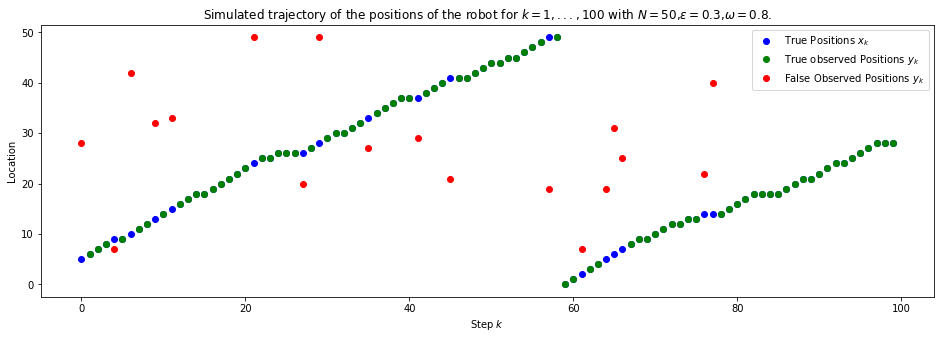

In [92]:
true_positions,observations=Path(k_max,N,T,O)
x1,y1,x2,y2=co_fo(true_positions,observations,k_max)
plt.figure(figsize=(16,5))
plt.plot(np.arange(k_max), true_positions,'bo', label="True Positions $x_k$")

plt.plot(x1, y1,'go', label="True observed Positions $y_k$")
plt.plot(x2, y2,'ro', label="False Observed Positions $y_k$")

plt.legend()
plt.title("Simulated trajectory of the positions of the robot for $k= 1,...,100$ with $N= 50$,$\epsilon= 0.3$,$\omega= 0.8$.")
plt.xlabel("Step $k$")
plt.ylabel("Location")
plt.show()

5.  Implement  the  Forward-Backward  algorithm  for  computing  the  quantities  defined  in  3-a,b,f.   (Attention:  becareful with numerical stability!  Modify the log-sum-exp trick for this algorithm)

#### 5.1 Forward step $\mathbb{P}(x_k,y_{1:k})$

$\begin{equation}\begin{split}
\underbrace{p(x_k, y_{1:k}) }_\text{ $\alpha_{k}$ }  &= \sum_{x_{k-1}} p(x_k, y_{1:k}, x_{k-1}) \\
&= \sum_{x_{k-1}}p(y_k | y_{1:k-1}, x_{k-1}, x_k)p(y_{1:k-1}, x_{k-1}, x_k) \\
&= \sum_{x_{k-1}}p(y_k | y_{1:k-1}, x_{k-1}, x_k)p(x_k | y_{1:k-1}, x_{k-1})p(x_{k-1}, y_{1:k-1}) \\
&= \sum_{x_{k-1}}p(y_k | x_k)p(x_k | x_{k-1}) \underbrace{p(x_{k-1}, y_{1:k-1}) }_\text{ $\alpha_{k-1}$ } \\
&= O_k^T T\alpha_{k-1} \quad\text{for } k >2\text{, and}\quad \alpha_1 = p(x_1, y_{1}) = p(x_1)p(y_{1}|x_1)   \\
\end{split}\end{equation}$




#### 5.2 Backward step $\mathbb{P}(y_{k+1:n} | x_k)$

$\begin{equation}\begin{split}
\underbrace{p(y_{k+1:n} | x_k) }_\text{ $\beta_{k}$ } &= \sum_{x_{k+1}} p(y_{k+2:n}, y_{k+1}, x_{k+1} |x_k) \\
&= \sum_{x_{k+1}} p(y_{k+2:n} |y_{k+1}, x_{k+1}, x_k)p(y_{k+1}, x_{k+1}| x_k) \\
&= \sum_{x_{k+1}} p(y_{k+2:n} |y_{k+1}, x_{k+1}, x_k)p(y_{k+1}| x_{k+1}, x_k)p(x_{k+1} | x_k) \\
&= \sum_{x_{k+1}} \underbrace{p(y_{k+2:n} |x_{k+1}) }_\text{ $\beta_{k+1}$ }  p(y_{k+1}| x_{k+1})p(x_{k+1} | x_k) \\
&= O_{k+1}^T \beta_{k+1} T \\
\end{split}\end{equation}$




Multiplying a series of terms $p_1p_2⋯p_n$ where $0≤p_i≤1$ can easily result in a numerical underflow. This is especially the case when dealing with probabilistic models which involve such multiplication all the time. One solution commonly used is to work with the log of probabilities instead which turns multiplication into a summation. Since a summation does not decrease the magnitude of the result, the underflow problem can be avoided.

Unfortunately, this little trick alone does not work when we have a sum of products of probabilities as in the case of, for example, the backward algorithm used in HMM,The solution here is the same as before. That is, we work with $log(\beta_{k+1})$  instead. So, by taking the $log$ on both sides as well as putting $explog$ in the sum, we have:


$\begin{equation} 
\begin{split}
log(\beta_{k+1}) &= log(\sum_{x_{k+1}} exp(log( p(y_{k+2:n} |x_{k+1}) p(y_{k+1}| x_{k+1})p(x_{k+1} | x_k)) )) \\
 & = log ( \sum\limits_{i=1}^n e^{v_i})
\end{split}
\end{equation}$

### References:
1. [Log-Sum-Exp Trick to Prevent Numerical Underflow](http://http://wittawat.com/posts/log-sum_exp_underflow.html).

In [0]:
def Forward_Pass(T=T, O=O, observations=observations, N=N, k_max=k_max):  
  
    p0=np.ones(N)/N
    log_α= np.zeros((N, k_max))
    log_α[:, 0] = np.log(O[observations[0], :]) +np.log(p0) 
    for k in range(1, k_max):
        m = np.max(log_α[:, k-1])
        log_α[:, k] =m+ np.log(np.dot(T, np.exp(log_α[:, k-1] - m))) +np.log(O[observations[k], :])
    return log_α




In [0]:
def Backward_Pass(T=T, O=O, observations=observations, N=N, k_max=k_max):
   
    log_β = np.zeros((N, k_max))
    
    log_β[:, k_max-1] = np.log(O[observations[k_max-1], :])
    

    for k in range(k_max-2, -1, -1):
        m = np.max(log_β[:, k+1])
        log_β[:, k] = m + np.log(np.dot(np.exp(log_β[:, k+1]-m), T))
        log_β[:, k] = np.log(O[observations[k], :]) +log_β[:, k]  
    return log_β





#### 5.3 Computing  the  quantities  $p(x_k | y_{1:n}) $

$\begin{equation}\begin{split}
\underbrace{p(x_k | y_{1:n}) }_\text{ $\gamma_{k}$ }   &= \frac{1}{p(y_{1:n})}\times p(x_k, y_{1:n}) = \frac{1}{p(y_{1:n})}\times p(x_k, y_{1:k}, y_{k+1:n}) \\
&= \frac{1}{p(y_{1:n})}\times p(y_{k+1:n} | x_k, y_{1:k})p(x_k, y_{1:k})\\
&= \frac{1}{p(y_{1:n})}\times \underbrace{p(y_{k+1:n} | x_k) }_\text{ $\beta_{k+1}$ } \underbrace{p(x_k, y_{1:k}) }_\text{ $\alpha_{k}$ }   \\
& \propto \beta_{k+1}.\alpha_{k}  \\
\end{split}\end{equation}$



#### 5.4 Finding $\underset{a}{\text{argmax}} \; p(x_{n} = a \,| y_{1:n})$

From $\textbf{5.3}$ , we have the following :

$\begin{equation}
\underbrace{p(x_k | y_{1:n}) }_\text{ $\gamma_{k}$ }  \propto \beta_{k+1}.\alpha_{k}
\end{equation}$


- First we will compute the forward pass $\alpha_k$ and backword pass $\beta_k$ .

- Then we sum   $log(\alpha_k) +  log(\beta_k)$ .

- To get back to probability domain we will use the exponential function .

- Finaly  we will normalize the output  to have a total probability of one at each k step and we  pick the index of the maximum value of $\gamma_k$.

#### Note : $\text{To avoid wrong computations we will shift the exponential function by the $max_{i \in \gamma_{k}  } \gamma_{k,i}$.}$

In [0]:
def Normalizing (A, axis=None):
    A =  np.exp(A-np.max(A, keepdims=True, axis=axis))
    A=A / A.sum(axis=axis, keepdims=True)
    
    return A
  
  

In [0]:
def Argmax(A):
  t=[]
  for i in np.arange(A.shape[1]):
    t.append(np.argmax(A[:,i]))
  return np.array(t)

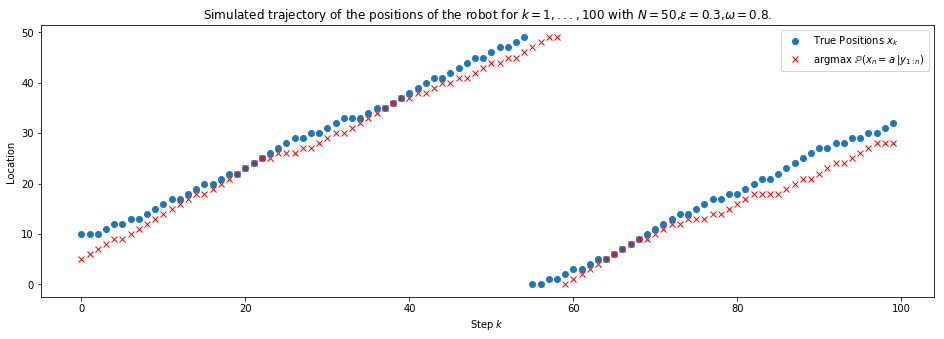

In [97]:

true_positions,observations=Path(k_max,N,T,O)

log_β = Backward_Pass()
log_α= Forward_Pass()


α = Normalizing(log_α, axis=0)
β = Normalizing(log_β, axis=0)
γ = Normalizing(log_α+log_β, axis=0)



plt.figure(figsize=(16,5))
plt.plot(np.arange(k_max), true_positions,'o', label="True Positions $x_k$")
plt.plot(np.arange(k_max), Argmax(γ),'x',color='red', label="argmax $  \mathbb{P}(x_{n} = a \,| y_{1:n})$")
plt.legend()
plt.title("Simulated trajectory of the positions of the robot for $k= 1,...,100$ with $N= 50$,$\epsilon= 0.3$,$\omega= 0.8$.")
plt.xlabel("Step $k$")
plt.ylabel("Location ")
plt.show()

6.  Assume now that at each step the robot can be kidnapped with probabilit $κ$.  If the robot is kidnapped its newposition is independent from its previous position and is uniformly distributed.  Repeat 4 and 5 for this newmodel with $κ= 0.1$.  Can you reuse your code?

We can reuse our code  by creating a new transition Matrix denoted $ T^* $ As following :


$\begin{equation}\begin{split}
T^*= κ 𝐽_N  +(1-κ) T  \quad \text{ Where $𝐽_N$ is   N $\times$ N all-ones matrix  }  \\ 
\end{split}\end{equation}$

In [0]:
κ = 0.1
T = (κ/N)* np.ones((N, N))+ (1-κ ) * T


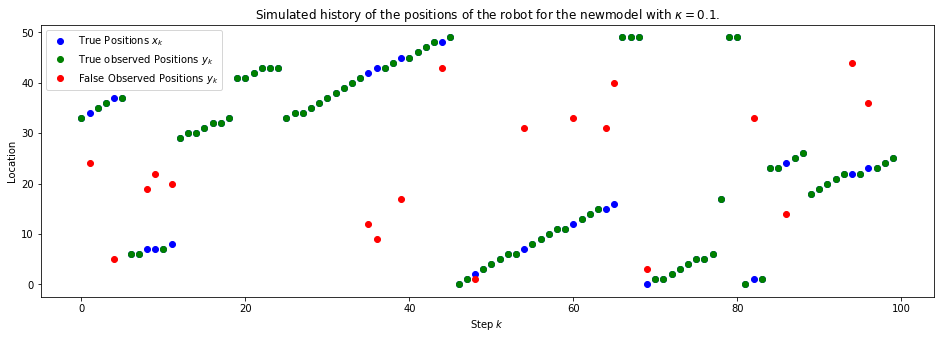

In [99]:
true_positions, observations = Path(k_max,N,T,O)


x1,y1,x2,y2=co_fo(true_positions,observations,k_max)
plt.figure(figsize=(16,5))
plt.plot(np.arange(k_max), true_positions,'bo', label="True Positions $x_k$")

plt.plot(x1, y1,'go', label="True observed Positions $y_k$")
plt.plot(x2, y2,'ro', label="False Observed Positions $y_k$")

plt.legend()
plt.title("Simulated history of the positions of the robot for the newmodel with $κ= 0.1$.")
plt.xlabel("Step $k$")
plt.ylabel("Location")
plt.show()


log_α = Forward_Pass(T=T, observations=observations)
log_β = Backward_Pass(T=T, observations= observations)

α = Normalizing(log_α, axis=0)
β = Normalizing(log_β, axis=0)
γ = Normalizing(log_α+log_β, axis=0)



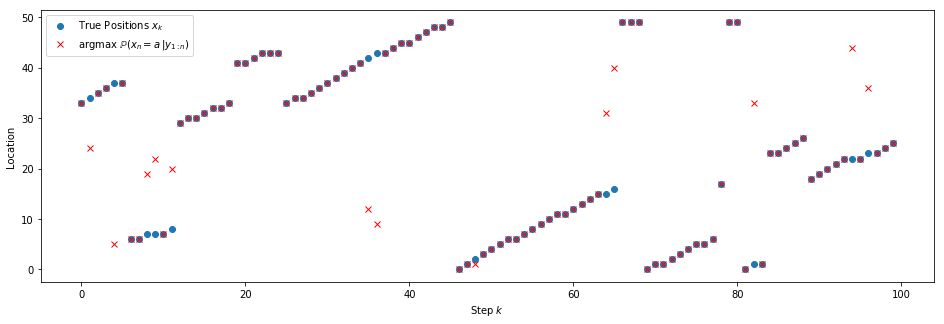

In [100]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(k_max), true_positions,'o', label="True Positions $x_k$")
plt.plot(np.arange(k_max), Argmax(γ),'x',color='red', label="argmax $  \mathbb{P}(x_{n} = a \,| y_{1:n})$")
plt.legend()

plt.xlabel("Step $k$")
plt.ylabel("Location ")
plt.show()